In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [49]:
data = load_wine()

In [50]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [51]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [52]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [53]:
df['target'] = data.target

In [54]:
df['target_names'] = df['target'].apply(lambda x: data.target_names[x])

In [55]:
df['target_names'].unique()

array(['class_0', 'class_1', 'class_2'], dtype=object)

In [56]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_names                    0
dtype: int64

In [58]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [59]:
type = df.groupby('target_names')

In [60]:
type['magnesium'].mean()

target_names
class_0    106.338983
class_1     94.549296
class_2     99.312500
Name: magnesium, dtype: float64

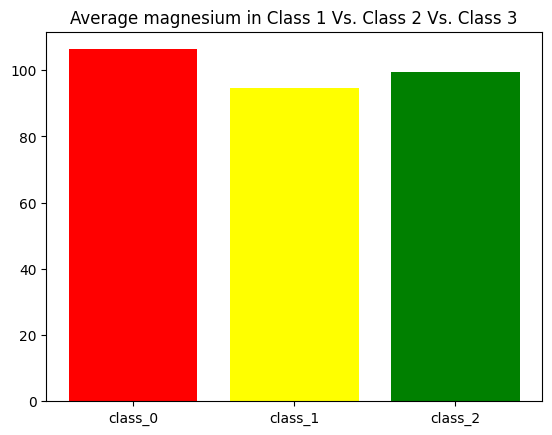

In [61]:
plt.bar(type['magnesium'].mean().index, height = type['magnesium'].mean().values, color = ['red', 'yellow', 'green'])
plt.title('Average magnesium in Class 1 Vs. Class 2 Vs. Class 3')
plt.show()

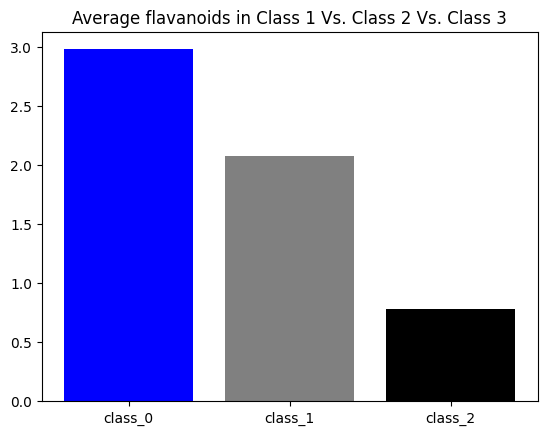

In [62]:
plt.bar(type['flavanoids'].mean().index, height = type['flavanoids'].mean().values, color = ['Blue', 'Grey', 'Black'])
plt.title('Average flavanoids in Class 1 Vs. Class 2 Vs. Class 3')
plt.show()

In [63]:
X = df.drop(['target', 'target_names'], axis = 1)

In [64]:
y = df.target

In [94]:
scores = cross_val_score(MultinomialNB(), X, y, cv = 10)

<AxesSubplot: >

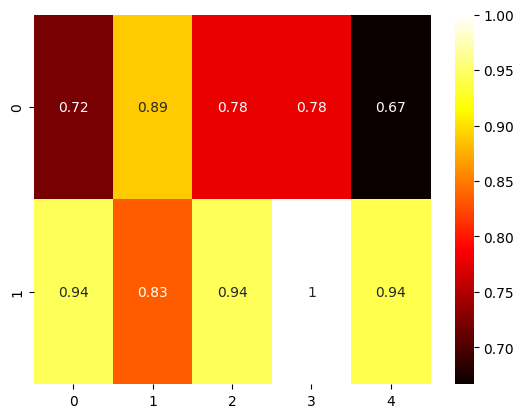

In [95]:
sns.heatmap(scores.reshape(2,5), annot = True, cmap = 'hot')

In [98]:
scores = cross_val_score(GaussianNB(), X, y, cv = 10)

<AxesSubplot: >

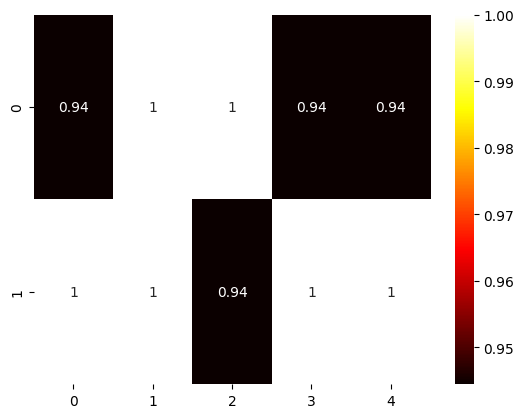

In [99]:
sns.heatmap(scores.reshape(2,5), annot = True, cmap = 'hot')